In [3]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import datetime
import matplotlib
import matplotlib.pyplot as plt


import pickle
import joblib

In [4]:
df = pd.read_csv("Mondayroute40.csv", low_memory=False)

In [5]:
df.head(100)

,Unnamed: 0,Timestamp,LineID,JourneyPatternID,VehicleJourneyID,Congestion,Delay,StopID,AtStop,Date,Seconds,Day
0,264888,1352703346000000,40.0,400001,6424,0,-293,52,0,2012-11-12 06:55:46,0.0,0
1,264890,1352703346000000,40.0,400001,6420,0,-624,1947,0,2012-11-12 06:55:46,0.0,0
2,264893,1352703348000000,40.0,400001,6408,0,-338,2712,0,2012-11-12 06:55:48,0.0,0
3,264895,1352703348000000,40.0,400001,6429,0,-332,7471,0,2012-11-12 06:55:48,0.0,0
4,264901,1352703350000000,40.0,400001,6434,0,-264,1523,0,2012-11-12 06:55:50,0.0,0
5,264917,1352703362000000,40.0,400001,6412,1,-629,4411,0,2012-11-12 06:56:02,0.0,0
6,264962,1352703391000000,40.0,400001,6434,0,-280,1524,1,2012-11-12 06:56:31,41.0,0
7,264980,1352703407000000,40.0,400001,6424,0,-257,261,1,2012-11-12 06:56:47,61.0,0
8,264982,1352703407000000,40.0,400001,6408,0,-315,2655,1,2012-11-12 06:56:47,59.0,0
9,265016,1352703425000000,40.0,400001,6429,0,-292,1533,1,2012-11-12 06:57:05,77.0,0


In [6]:
gb = df.groupby(['VehicleJourneyID'], group_keys=False)

In [7]:
df.head(10)

,Unnamed: 0,Timestamp,LineID,JourneyPatternID,VehicleJourneyID,Congestion,Delay,StopID,AtStop,Date,Seconds,Day
0,264888,1352703346000000,40.0,400001,6424,0,-293,52,0,2012-11-12 06:55:46,0.0,0
1,264890,1352703346000000,40.0,400001,6420,0,-624,1947,0,2012-11-12 06:55:46,0.0,0
2,264893,1352703348000000,40.0,400001,6408,0,-338,2712,0,2012-11-12 06:55:48,0.0,0
3,264895,1352703348000000,40.0,400001,6429,0,-332,7471,0,2012-11-12 06:55:48,0.0,0
4,264901,1352703350000000,40.0,400001,6434,0,-264,1523,0,2012-11-12 06:55:50,0.0,0
5,264917,1352703362000000,40.0,400001,6412,1,-629,4411,0,2012-11-12 06:56:02,0.0,0
6,264962,1352703391000000,40.0,400001,6434,0,-280,1524,1,2012-11-12 06:56:31,41.0,0
7,264980,1352703407000000,40.0,400001,6424,0,-257,261,1,2012-11-12 06:56:47,61.0,0
8,264982,1352703407000000,40.0,400001,6408,0,-315,2655,1,2012-11-12 06:56:47,59.0,0
9,265016,1352703425000000,40.0,400001,6429,0,-292,1533,1,2012-11-12 06:57:05,77.0,0


In [8]:
df['Hour']= df['Date']

In [9]:
df.dtypes

Unnamed: 0            int64
Timestamp             int64
LineID              float64
JourneyPatternID      int64
VehicleJourneyID      int64
Congestion            int64
Delay                 int64
StopID                int64
AtStop                int64
Date                 object
Seconds             float64
Day                   int64
Hour                 object
dtype: object

In [10]:
df['Date'] = pd.to_datetime(df['Timestamp'], unit='us')

In [11]:
for iter in range (len(df)):
    df.iloc[iter,12]=df.iloc[iter, 9].hour

In [12]:
df.head(100)

,Unnamed: 0,Timestamp,LineID,JourneyPatternID,VehicleJourneyID,Congestion,Delay,StopID,AtStop,Date,Seconds,Day,Hour
0,264888,1352703346000000,40.0,400001,6424,0,-293,52,0,2012-11-12 06:55:46,0.0,0,6
1,264890,1352703346000000,40.0,400001,6420,0,-624,1947,0,2012-11-12 06:55:46,0.0,0,6
2,264893,1352703348000000,40.0,400001,6408,0,-338,2712,0,2012-11-12 06:55:48,0.0,0,6
3,264895,1352703348000000,40.0,400001,6429,0,-332,7471,0,2012-11-12 06:55:48,0.0,0,6
4,264901,1352703350000000,40.0,400001,6434,0,-264,1523,0,2012-11-12 06:55:50,0.0,0,6
5,264917,1352703362000000,40.0,400001,6412,1,-629,4411,0,2012-11-12 06:56:02,0.0,0,6
6,264962,1352703391000000,40.0,400001,6434,0,-280,1524,1,2012-11-12 06:56:31,41.0,0,6
7,264980,1352703407000000,40.0,400001,6424,0,-257,261,1,2012-11-12 06:56:47,61.0,0,6
8,264982,1352703407000000,40.0,400001,6408,0,-315,2655,1,2012-11-12 06:56:47,59.0,0,6
9,265016,1352703425000000,40.0,400001,6429,0,-292,1533,1,2012-11-12 06:57:05,77.0,0,6


In [13]:
features = ['Hour' , 'Day', 'StopID','VehicleJourneyID']

X = pd.concat([df[features]], axis=1)
y = df.Seconds

X

,Hour,Day,StopID,VehicleJourneyID
0,6,0,52,6424
1,6,0,1947,6420
2,6,0,2712,6408
3,6,0,7471,6429
4,6,0,1523,6434
5,6,0,4411,6412
6,6,0,1524,6434
7,6,0,261,6424
8,6,0,2655,6408
9,6,0,1533,6429


In [14]:
rfc = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1)

In [15]:
rfc.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [16]:
rfc_predictions = rfc.predict(X)

In [17]:
print("The value of R^2", metrics.r2_score(y, rfc_predictions))

The value of R^2 0.987797101108


In [18]:
true_v_pred = pd.DataFrame({'Actual Value': y, 'Predicted Value': rfc_predictions})
true_v_pred

,Actual Value,Predicted Value
0,0.0,181.30
1,0.0,68.10
2,0.0,68.64
3,0.0,274.73
4,0.0,18.89
5,0.0,35.48
6,41.0,37.28
7,61.0,236.04
8,59.0,80.81
9,77.0,138.95


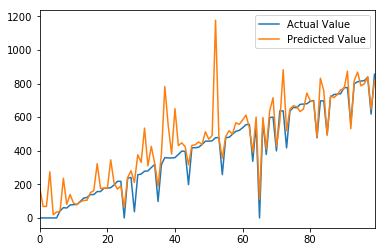

In [19]:
true_v_pred.head(100).plot()

In [20]:
pickle.dump(rfc, open("test.sav", 'wb'))

In [21]:
pickled_rfc =pickle.load(open("test.sav", 'rb'))

In [22]:
# new dataframe

info = [{
    'Day': 0,
    'Hour': 6,
    'StopID': 52,
    'VehicleJourneyID': 6424
}]
single_df = pd.DataFrame(info)

# single_df = pd.DataFrame({'Day': 5, 'Hour': 3, 'StopID': 4596})
# single_df = pd.DataFrame.from_dict(info, orient='columns')


new_predictions = pickled_rfc.predict(single_df)

In [23]:
new_predictions

array([ 181.3])

In [24]:
info = [{
    'Day': 0,
    'Hour': 6,
    'StopID': 261,
    'VehicleJourneyID': 6464
}]
single_df = pd.DataFrame(info)

# single_df = pd.DataFrame({'Day': 5, 'Hour': 3, 'StopID': 4596})
# single_df = pd.DataFrame.from_dict(info, orient='columns')


new_predictions2 = pickled_rfc.predict(single_df)

In [25]:
new_predictions2

array([ 1302.73])

In [26]:
new_predictions2[0]-new_predictions[0]

1121.4300000000001

In [27]:
new_predictions2[0]-new_predictions[0]

1121.4300000000001

In [54]:
joblib.dump(rfc,'joblibo.lzma', compress=9)

['joblibo.lzma']

In [55]:
joblib_pred=joblib.load("joblibo.lzma")

In [56]:
info = [{
    'Day': 0,
    'Hour': 6,
    'StopID': 261,
    'VehicleJourneyID': 6464
}]
single_df = pd.DataFrame(info)

# single_df = pd.DataFrame({'Day': 5, 'Hour': 3, 'StopID': 4596})
# single_df = pd.DataFrame.from_dict(info, orient='columns')


new_predictions2 = joblib_pred.predict(single_df)

In [57]:
new_predictions2

array([ 1302.73])